In [1]:
import gurobipy as gp
from gurobipy import GRB
import numpy as np
import pandas as pd
import scipy.sparse as sp
import matplotlib.pyplot as plt

# Linear Problem Task 5

In [2]:
time_periods = np.arange(1,7)
time_periods

array([1, 2, 3, 4, 5, 6])

In [3]:
cp = np.asarray([3,4,3,4,4,5])
CP = sp.diags(cp)
cf = np.asarray([12,15,30,23,19,45])
CF = sp.diags(cf)
cs = np.asarray([1,1,1,1,1,1])
CS = sp.diags(cs)
d = np.asarray([6,7,4,6,3,8])
g = 10

In [4]:
model = gp.Model('ProductionMgmtProblem')

Set parameter Username
Academic license - for non-commercial use only - expires 2022-08-02


In [5]:
x = model.addVars(time_periods, vtype = GRB.CONTINUOUS, name='x_')
y = model.addVars(time_periods, vtype = GRB.BINARY, name='y_')
z = model.addVars(np.arange(0,7), vtype = GRB.CONTINUOUS, name='z_')

In [6]:
model.setObjective(gp.quicksum(x[t]*cp[t-1] for t in time_periods)
                    +gp.quicksum(y[t]*cf[t-1] for t in time_periods)
                    +gp.quicksum(z[t]*cs[t-1] for t in time_periods), GRB.MINIMIZE)

In [7]:
model.addConstrs(z[t-1]+x[t] == d[t-1]+z[t] for t in time_periods)

{1: <gurobi.Constr *Awaiting Model Update*>,
 2: <gurobi.Constr *Awaiting Model Update*>,
 3: <gurobi.Constr *Awaiting Model Update*>,
 4: <gurobi.Constr *Awaiting Model Update*>,
 5: <gurobi.Constr *Awaiting Model Update*>,
 6: <gurobi.Constr *Awaiting Model Update*>}

In [8]:
model.addConstrs(x[t] <= g*y[t] for t in time_periods)

{1: <gurobi.Constr *Awaiting Model Update*>,
 2: <gurobi.Constr *Awaiting Model Update*>,
 3: <gurobi.Constr *Awaiting Model Update*>,
 4: <gurobi.Constr *Awaiting Model Update*>,
 5: <gurobi.Constr *Awaiting Model Update*>,
 6: <gurobi.Constr *Awaiting Model Update*>}

In [9]:
model.addConstr(z[0]==0)

<gurobi.Constr *Awaiting Model Update*>

In [10]:
model.write('ProductionMgmtProblem.lp')

In [11]:
model.optimize()

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[rosetta2])
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 13 rows, 19 columns and 31 nonzeros
Model fingerprint: 0xd8fbcffb
Variable types: 13 continuous, 6 integer (6 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+01]
  Objective range  [1e+00, 4e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e+00, 8e+00]
Presolve removed 6 rows and 8 columns
Presolve time: 0.00s
Presolved: 7 rows, 11 columns, 17 nonzeros
Variable types: 7 continuous, 4 integer (4 binary)
Found heuristic solution: objective 278.0000000

Root relaxation: objective 2.042000e+02, 7 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0  204.20000    0    1  278.00000  204.20000  26.5%     -    0s
H    0     0                     218.0000000

In [12]:
model.getVars()

[<gurobi.Var x_[1] (value 10.0)>,
 <gurobi.Var x_[2] (value 6.999999999999998)>,
 <gurobi.Var x_[3] (value 0.0)>,
 <gurobi.Var x_[4] (value 7.0)>,
 <gurobi.Var x_[5] (value 10.0)>,
 <gurobi.Var x_[6] (value 0.0)>,
 <gurobi.Var y_[1] (value 1.0)>,
 <gurobi.Var y_[2] (value 1.0)>,
 <gurobi.Var y_[3] (value -0.0)>,
 <gurobi.Var y_[4] (value 1.0)>,
 <gurobi.Var y_[5] (value 1.0)>,
 <gurobi.Var y_[6] (value -0.0)>,
 <gurobi.Var z_[0] (value 0.0)>,
 <gurobi.Var z_[1] (value 4.0)>,
 <gurobi.Var z_[2] (value 3.9999999999999982)>,
 <gurobi.Var z_[3] (value 0.0)>,
 <gurobi.Var z_[4] (value 1.0)>,
 <gurobi.Var z_[5] (value 8.0)>,
 <gurobi.Var z_[6] (value 0.0)>]

In [13]:
x_star = []
y_star = []
z_star = []
for t in time_periods:
    x_star.append(x[t].x)
    y_star.append(y[t].x)
    z_star.append(z[t].x)

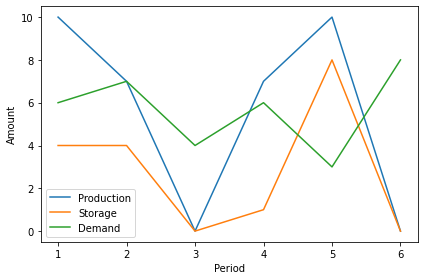

In [14]:
plt.plot(range(1,7), x_star, label='Production')
plt.plot(range(1,7), z_star, label= 'Storage')
plt.plot(range(1,7), d, label = 'Demand')
plt.ylabel('Amount')
plt.xlabel('Period')
plt.legend()
plt.tight_layout()
plt.savefig('PlotBenchmark.png')

In [28]:
a = np.asarray([1,2,3])

In [34]:
a[2:3].sum()

3

In [56]:
a[0]=2

In [57]:
a

array([2, 2, 3])

In [59]:
b = a

In [60]:
b

array([2, 2, 3])

In [61]:
a[0]=1

In [62]:
a

array([1, 2, 3])

In [63]:
b

array([1, 2, 3])